In [1]:
import json
import utils.plotting_tools as plot

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


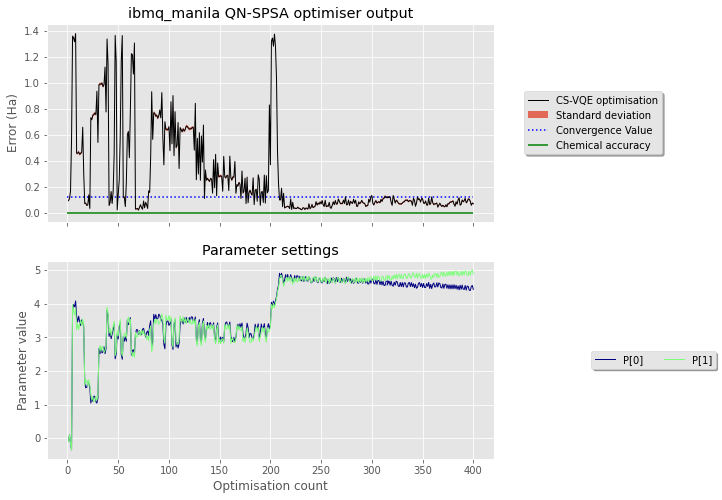

In [6]:
file = 'H3+_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

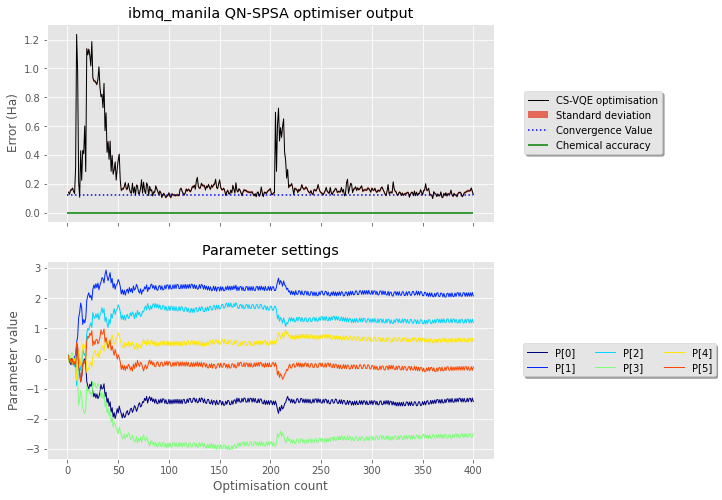

In [7]:
file = 'FH_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

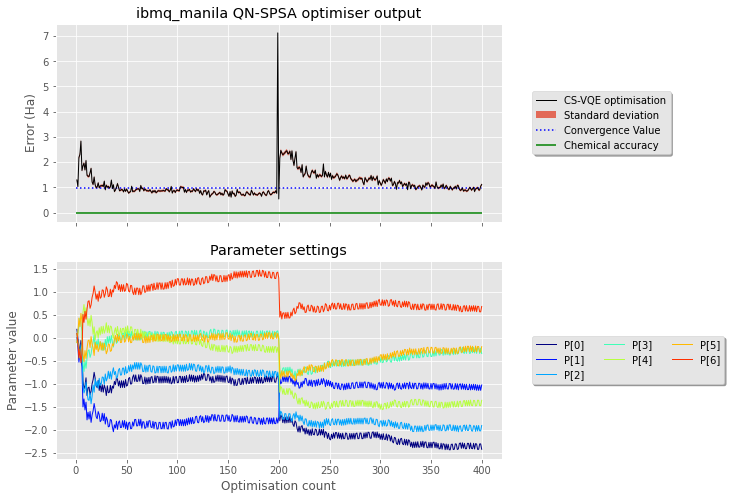

In [8]:
file = 'B+_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)
fig.savefig('plots/'+file+'.png', dpi=300, bbox_inches='tight')

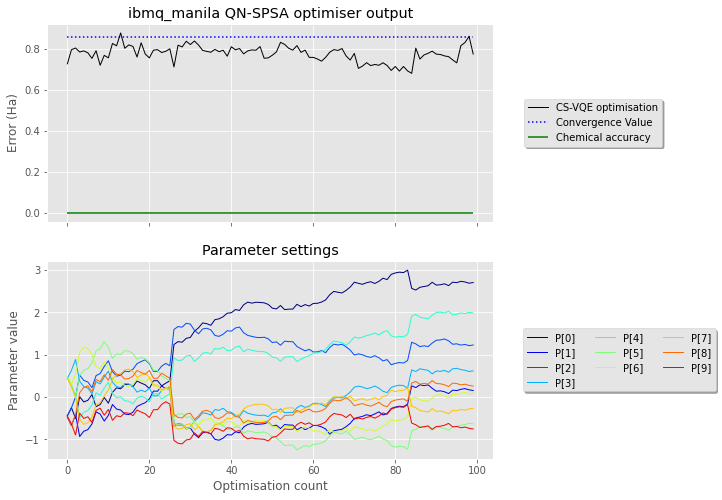

In [5]:
file = 'LiH_STO-3G_SINGLET_UCCSD_taper_CS-VQE_convergence_projected_ansatz'
with open('data/IBMQ-runtime/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot.plot_parameter_settings_alt(cs_vqe_data)